In [ ]:
#Plot the duration of each experiment normalised from the manual annotations

In [31]:
from pathlib import Path
import numpy as np

data_folder = Path("/Users/persie/PhD_Code/3d_ant_data_rle/")
session_list = [6,10,11,13,17,19,20,21,22,23,26,28,29,30]
prefix = "240905-1616"
skeleton_toml_path = "../skeleton.toml"

In [32]:
import toml
path = data_folder

file_path = path / f"{prefix}/inputs/ground_truth_ant_contact.toml"
full_toml = toml.load(file_path)
gt = full_toml[prefix]

In [33]:
annotation_gt = {}
for session in gt:
    scaled_gt = np.array(gt[session][0]) * 0.01
    annotation_gt[session] = [[((scaled_gt[1] - scaled_gt[0]), (scaled_gt[2] - scaled_gt[1]))], [((scaled_gt[3]-scaled_gt[0]), 0.125)]]

In [43]:
label_names = {
    'session22': 'Session 22',
    'session29': 'Session 29',
    'session10': 'Session 10',
    'session13': 'Session 13',
    'session23': 'Session 23',
    'session17': 'Session 17',
    'session21': 'Session 21',
    'session20': 'Session 20',
    'session19': 'Session 19',
    'session28': 'Session 28',
    'session26': 'Session 26',
    'session6' : 'Session 6' ,
    'session11': 'Session 11',
    'session30': 'Session 30'}

IED = {
        'session22': 0.9724667940058592,
        'session29': 1.1156112300670382,
        'session10': 1.1671577213659496,
        'session13': 1.180947285804602,
        'session23': 1.1839014271322221,
        'session17': 1.1932987842771259,
        'session21': 1.2022732832768028,
        'session20': 1.2097410103135808,
        'session28': 1.7620030533752093,
        'session26': 1.7660809268148052,
        'session6': 1.7838840082980638,
        'session11': 1.7919731086659347,
        'session30': 1.7926250436836866,
        'session19': 1.8026882377472861}

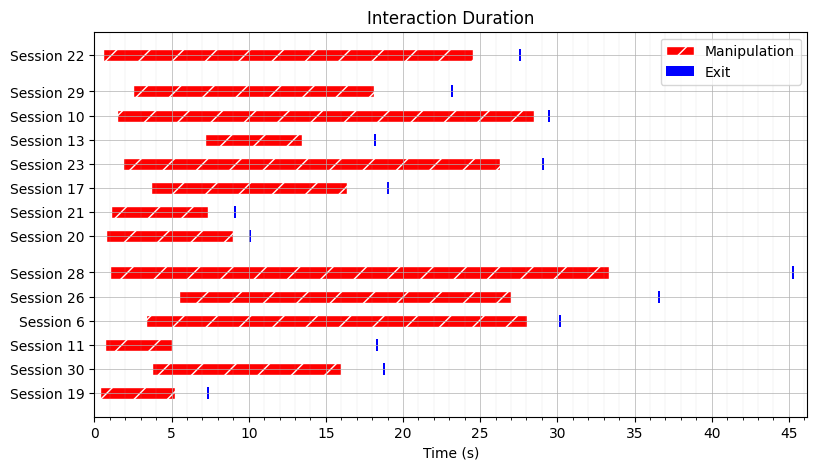

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator


def survey(results, inter_eye_distance, label_names_dict):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(inter_eye_distance.keys())
    label_names = [label_names_dict[label] for label in labels]
    data = np.array(list(results.values()))



    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.set_xlim(0, np.sum(data, axis=1).max())

    ax.grid(visible=True, which='major', linestyle='-', linewidth=0.5)
    ax.grid(visible=True, which='minor', linestyle='-', linewidth=0.1)

    y = -0.25
    y_tick: list[float] = []
    for label in labels:
        y_tick.append(y+0.25)
        ax.broken_barh(results[label][0], (y, 0.5), facecolor='red', label='Manipulation', hatch='/', edgecolor='w')
        ax.broken_barh(results[label][1], (y, 0.5), facecolor='blue', label='Exit')
        if IED[label] == 0.9724667940058592:
            y+=1.5
        elif IED[label] == 1.2097410103135808:
            y+=1.5
        else:
            y+=1



    ax.set_yticks(y_tick,
                  labels=label_names)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks(np.arange(0, 50, 5))
    ax.set_title("Interaction Duration")
    ax.set_xlabel("Time (s)")
    ax.legend(['Manipulation', 'Exit'])

    return fig, ax


survey(annotation_gt, IED, label_names)
plt.show()


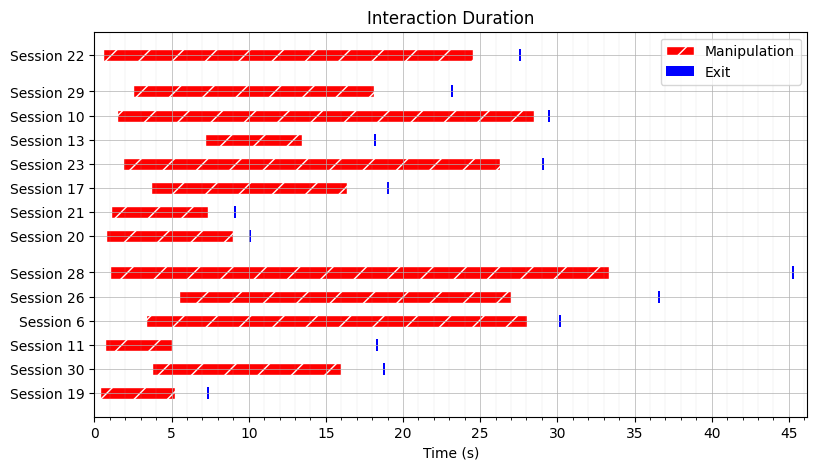

In [45]:
survey(annotation_gt, IED, label_names)
plt.savefig("/Users/persie/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Figures/Thesis Figures/Experiment Analysis/normalised_duration.svg")